For Devs

Figuring out how to create example vids


In [1]:
from typing import Any, List,Collection,Dict,Tuple
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import bsoid_ipynb_header  # Ensures that the bsoid module can found no matter what computer you use. Not necessary anywhere else.
import bsoid
# from bsoid import check_arg, logging_bsoid, config, statistics
logger = bsoid.config.initialize_logger('Pipelin-createVideoExamples')

In [2]:
### Instantiating data file paths
pipeline_name = 'example1.pipeline'
pipeline_file_path = os.path.join(bsoid.config.BSOID_BASE_PROJECT_PATH, 'output', pipeline_name)
assert os.path.isfile(pipeline_file_path)

In [3]:
p = bsoid.read_pipeline(pipeline_file_path)

2020-11-15 11:15:34,199 - C:\Users\killian\projects\B-SOID\bsoid\io.py               - DEBUG    - read_pipeline(): Trying to open: C:\Users\killian\projects\B-SOID\output\example1.pipeline
2020-11-15 11:15:34,244 - C:\Users\killian\projects\B-SOID\bsoid\io.py               - DEBUG    - read_pipeline(): Pipeline at C:\Users\killian\projects\B-SOID\output\example1.pipeline opened successfully!


In [4]:
# Get data set where it is predicted by the model
df = p.df_features_train_scaled.copy()
df.head()

,index,DistFrontPawsTailbaseRelativeBodyLength,DistBackPawsBaseTailRelativeBodyLength,InterforepawDistance,BodyLength,SnoutToTailbaseChangeInAngle,SnoutSpeed,TailbaseSpeed,scorer,frame,file_source,data_source,dim_1,dim_2,dim_3,gmm_assignment,is_test_data,svm_assignment
0,21788,0.891293,0.755149,1.084600,0.521937,0.637257,0.066744,0.485897,DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000,2937,C:\Users\killian\projects\B-SOID\example_data\Video3DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv,Video3DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv,-16.751085,3.619697,18.670547,12,True,12
1,27907,-0.590306,-0.075692,0.118740,-0.178832,0.030800,-0.282731,-0.121996,DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000,9056,C:\Users\killian\projects\B-SOID\example_data\Video3DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv,Video3DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv,-19.821964,-11.579646,-34.659081,1,True,1
2,11873,0.883916,1.044396,0.469022,1.004911,-0.051985,0.141922,0.325390,DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000,2387,C:\Users\killian\projects\B-SOID\example_data\Video2DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv,Video2DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv,4.103022,7.387649,23.261028,3,True,3
3,20245,1.215963,0.544161,0.237078,0.303330,0.017370,-0.176382,-0.122246,DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000,1394,C:\Users\killian\projects\B-SOID\example_data\Video3DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv,Video3DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv,-33.721294,25.904421,-2.396084,7,True,7
4,14008,0.543854,-0.512256,0.290913,-0.737650,-0.022857,-0.235316,-0.114827,DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000,4522,C:\Users\killian\projects\B-SOID\example_data\Video2DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv,Video2DLC_resnet50_EPM_DLC_BSOIDAug25shuffle1_495000.csv,-21.918512,-10.120231,36.819775,12,True,12


In [5]:
# Find out the total seconds of runtime in the video
fps = 30
runtime_seconds = len(df) / fps
runtime_seconds

945.6666666666666

In [6]:
# Calculate the duration, in seconds, that each behaviour runs.
duration_seconds_per_assignment = {}
data = list(df[p.svm_assignment_col_name].values)  # Ex: [1,2,3,3,3,3,4 .....]
for assignment in data:
    if assignment not in duration_seconds_per_assignment:
        duration_seconds_per_assignment[assignment] = 1/fps
    else:
        duration_seconds_per_assignment[assignment] = duration_seconds_per_assignment[assignment] + 1/fps
duration_seconds_per_assignment

{12: 44.16666666666672,
 1: 58.366666666665914,
 3: 63.43333333333229,
 7: 52.63333333333291,
 14: 59.63333333333251,
 2: 55.26666666666609,
 6: 61.56666666666573,
 0: 75.89999999999826,
 9: 56.799999999999336,
 4: 66.13333333333215,
 5: 62.333333333332355,
 15: 67.19999999999875,
 11: 48.99999999999978,
 13: 70.79999999999855,
 10: 54.63333333333279,
 8: 47.79999999999985}

In [7]:
duration_percent_of_each_assignment = {ass: dur/runtime_seconds for ass, dur in duration_seconds_per_assignment.items()}
duration_percent_of_each_assignment

{12: 0.04670426506873464,
 1: 0.06172012689460619,
 3: 0.06707789918928336,
 7: 0.0556573845611557,
 14: 0.06305956996827548,
 2: 0.058442016214310284,
 6: 0.06510398308071809,
 0: 0.0802608389143443,
 9: 0.0600634473034889,
 4: 0.06993302784631528,
 5: 0.0659146986253074,
 15: 0.07106097990835258,
 11: 0.05181529784984115,
 13: 0.07486781811772847,
 10: 0.05777229467747564,
 8: 0.05054635178004919}

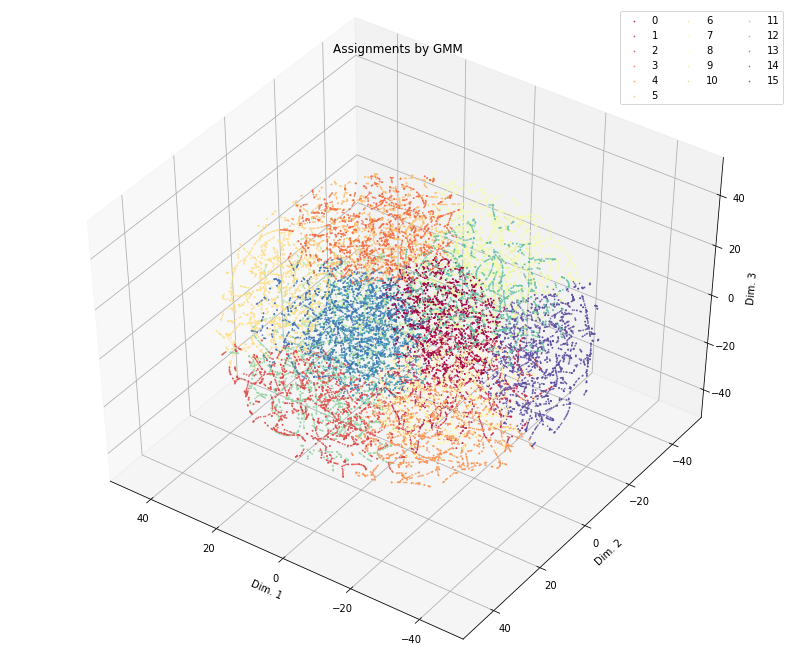

In [8]:
# View 3d plot of behaviour clusters (behaviours to be explicitly labeled later)
plt.rcParams['figure.figsize'] = [14, 12]                         # Adjust height, width of plot window below
azimuth_elevation = (45, 125)                                     # Adjust angle of viewing
fig, ax = p.plot_assignments_in_3d(azim_elev=azimuth_elevation)   # Generate 3d plot
plt.show()                                                        # Show plot